In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Overview of climate temperature projection data
- Annual, average daily maximum temperature projections for Champaign County, based on output from various climate models
<br><br>
- *More info*: https://crt-climate-explorer.nemac.org/climate_graphs/?city=Champaign%2C+IL&county=Champaign%2BCounty&area-id=17019&fips=17019&zoom=7&lat=40.1164204&lon=-88.2433829
<br><br>

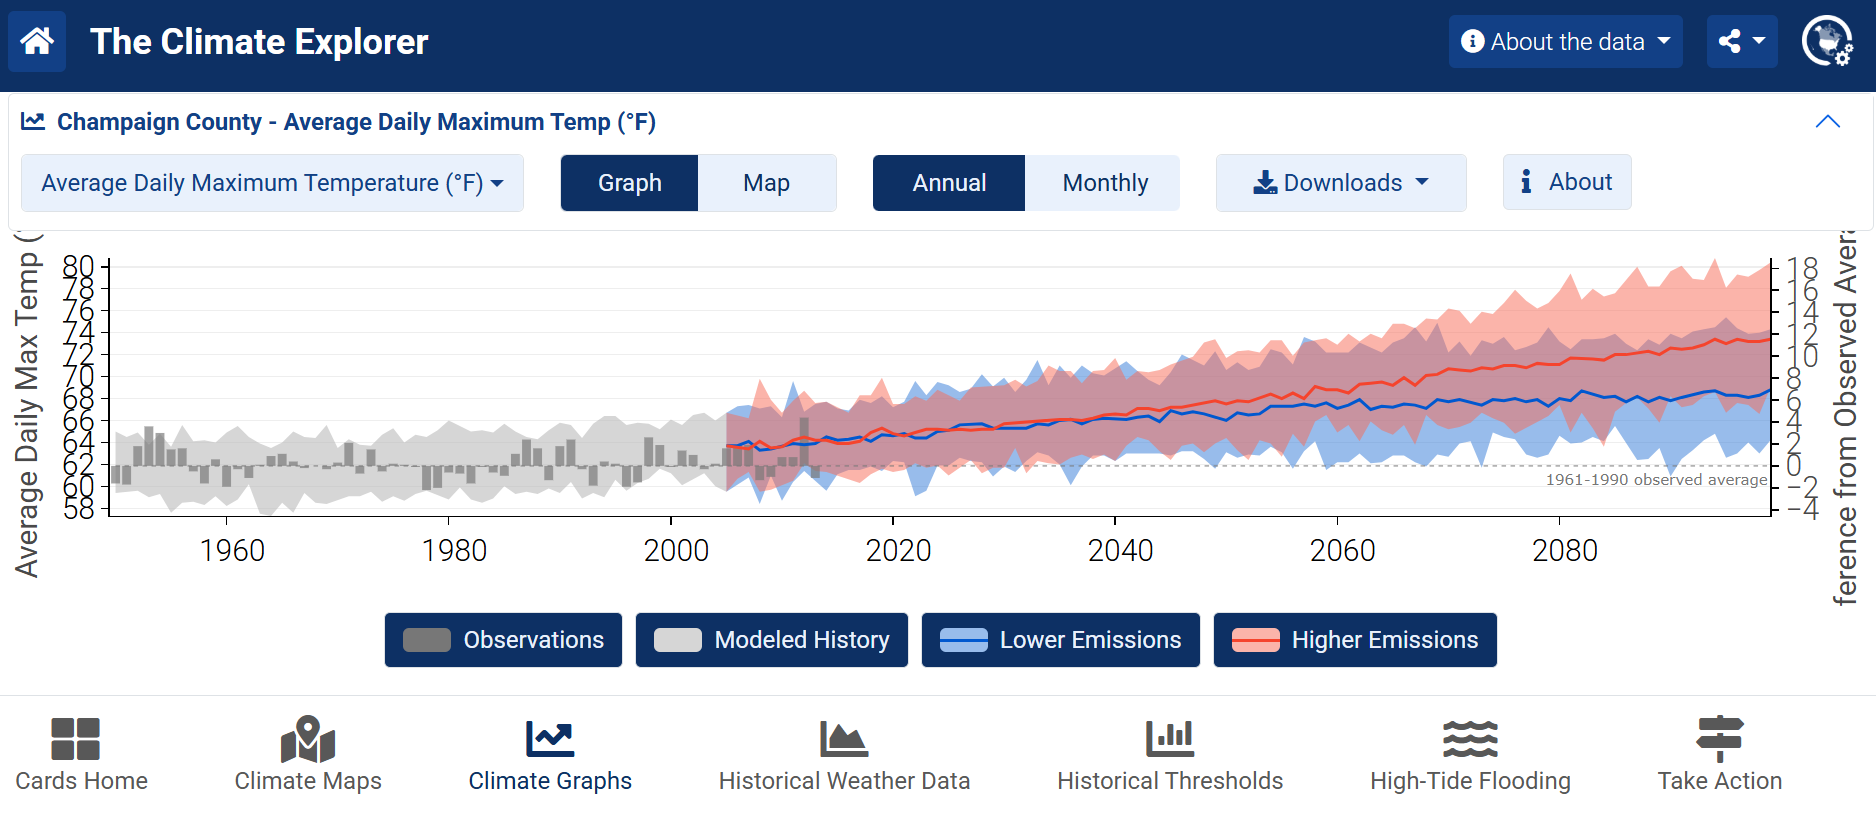

## Greenhouse gas concentration scenarios used
- Greenhouse gas concentrations = radiative forcing of climate
<br><br>
- **RCP4.5**:  Based on a future in which humans stop increasing global emissions of heat-trapping gases by 2040 and then dramatically reduce them through 2100
<br><br>
- **RCP8.5**:  Bbased on a future in which global emissions of heat-trapping gases continue increasing through 2100
<br><br>

## Important caveat regarding interpretation
- Projections are typically considered on a decadal (decade) scale, rather than annual scale - so don't interpret annual values themselves too much!

In [12]:
#(1) Read in the data. What logically should you set as your index?

data = pd.read_csv('Champaign_County-annual-proj_mod-tmax.csv', index_col='year')
data

,rcp45_weighted_mean,rcp45_min,rcp45_max,rcp85_weighted_mean,rcp85_min,rcp85_max,NOTE: This file contains annual projection values produced by global climate models. Decadal averages of these values (as shown in the Climate Explorer) are a more appropriate temporal scale for using projections.
year,,,,,,,
2005,63.7,59.5,66.7,63.7,59.5,66.7,NaN
2006,63.7,60.2,67.3,63.5,60.7,66.4,NaN
2007,64.1,60.8,67.4,63.4,61.3,66.2,NaN
2008,63.3,58.4,67.1,64.1,59.5,69.8,NaN
2009,63.4,61.0,67.3,63.5,59.7,67.9,NaN
...,...,...,...,...,...,...,...
2095,68.3,62.6,75.4,73.0,66.7,78.1,NaN
2096,68.3,63.0,74.4,73.4,67.6,79.3,NaN
2097,68.1,64.0,73.9,73.2,67.4,79.1,NaN


In [13]:
# (2) 
# (a) Drop the last column after reading the note
data = data.drop(columns=data.columns[-1],axis=1)
data

,rcp45_weighted_mean,rcp45_min,rcp45_max,rcp85_weighted_mean,rcp85_min,rcp85_max
year,,,,,,
2005,63.7,59.5,66.7,63.7,59.5,66.7
2006,63.7,60.2,67.3,63.5,60.7,66.4
2007,64.1,60.8,67.4,63.4,61.3,66.2
2008,63.3,58.4,67.1,64.1,59.5,69.8
2009,63.4,61.0,67.3,63.5,59.7,67.9
...,...,...,...,...,...,...
2095,68.3,62.6,75.4,73.0,66.7,78.1
2096,68.3,63.0,74.4,73.4,67.6,79.3
2097,68.1,64.0,73.9,73.2,67.4,79.1


In [14]:
# (2)
print(data.columns) # leading whitespaces - awkward when referencing column names moving forward
#(b.) Strip leading whitespaces using string manipulation functionality 
data.columns = data.columns.str.lstrip()
print(data.columns)

# This would work too, remvoves ALL whitespaces - fine for this as our column names ONLY have 
# extra whitespaces and not actually legitimate ones, i.e., our column names do not consist of
# multiple words
#data.columns = data.columns.str.replace(' ', '')

Index([' rcp45_weighted_mean', ' rcp45_min', ' rcp45_max',
       ' rcp85_weighted_mean', ' rcp85_min', ' rcp85_max'],
      dtype='object')
Index(['rcp45_weighted_mean', 'rcp45_min', 'rcp45_max', 'rcp85_weighted_mean',
       'rcp85_min', 'rcp85_max'],
      dtype='object')


In [15]:
# (2)
#(c.) Check for NaNs!
data.isna().sum()



rcp45_weighted_mean    0
rcp45_min              0
rcp45_max              0
rcp85_weighted_mean    0
rcp85_min              0
rcp85_max              0
dtype: int64

In [18]:
# (3) Indexing practice - access just the rcp45_weighted_mean and rcp85_weighted_mean columns 
# and save to weighted_means variable 

weighted_means = data[['rcp45_weighted_mean','rcp85_weighted_mean']]
weighted_means

# SCIENCE ALERT
# What are these weighted means?

# Global climate models are weighted using an approach that considers skill in climatological 
# performance of models over North America and interdependency of models arising from common parameterizations






,rcp45_weighted_mean,rcp85_weighted_mean
year,,
2005,63.7,63.7
2006,63.7,63.5
2007,64.1,63.4
2008,63.3,64.1
2009,63.4,63.5
...,...,...
2095,68.3,73.0
2096,68.3,73.4
2097,68.1,73.2


In [ ]:
# (4) Subtract the rcp45_weighted_mean column from the rcp85_weighted_mean column, save the result in a new column.

weighted_means['rcp85-rcp45'] = weighted_means['rcp85_weighted_mean'] - weighted_means['rcp45_weighted_mean']
weighted_means





/tmp/ipykernel_1286510/465041712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_means['rcp85-rcp45'] = weighted_means['rcp85_weighted_mean'] - weighted_means['rcp45_weighted_mean']


,rcp45_weighted_mean,rcp85_weighted_mean,rcp85-rcp45
year,,,
2005,63.7,63.7,0.0
2006,63.7,63.5,-0.2
2007,64.1,63.4,-0.7
2008,63.3,64.1,0.8
2009,63.4,63.5,0.1
...,...,...,...
2095,68.3,73.0,4.7
2096,68.3,73.4,5.1
2097,68.1,73.2,5.1


In [ ]:
# (5) Using idxmax, determine which year the projections have the greatest difference

max = weighted_means['rcp85-rcp45'].idxmax()
print(max)




2096


In [24]:
# (6) And - what is this greatest difference?  Do you think this is significant?
# Hint: think about what quantity we're evalulating here!

weighted_means.loc[2096, 'rcp85-rcp45']

# The difference is 5.1 degrees F, which seems significant.






5.1000000000000085

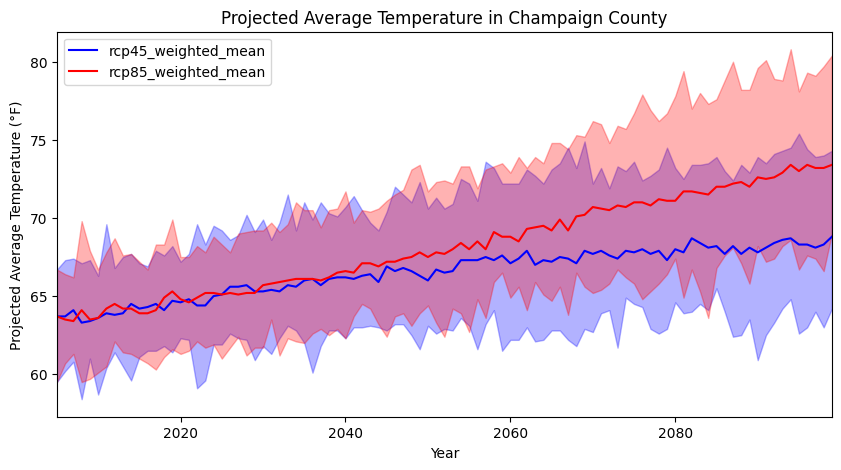

In [25]:
# (7) Finally - let's visualize 
# Create a line plot of the rcp45_weighted_mean and rcp85_weighted_mean data!
# Both on the same line plot!
# Let's use Pandas built-in functionality
# Which remember is just a 'shortcut' to accessing Matplotlib functionality

fig,ax = plt.subplots(figsize=(10,5))

# to remind you that we're passing a subset of the dataframe...aka your weighted_means variable!

data[['rcp45_weighted_mean','rcp85_weighted_mean']].plot(ax=ax,color=['blue','red']) # connecting this plot to the figure/axes we established
                                                                # in previous line allows for customization via ax.___
ax.set_ylabel('Projected Average Temperature (\u00b0F)')  # creates degree symbol! useful!
ax.set_xlabel('Year')
ax.set_title('Projected Average Temperature in Champaign County')
ax.set_xlim(np.min(data.index.values),np.max(data.index.values))

# This is a useful function that fills between values we pass it
# One way we can visualize uncertainty, ranges, etc!
# rcp45_min and max are the minimum and maximum projections when we consider all
# the climate models in the ensemble
# So - that gives us a sense of the RANGE and therefore a sense of the uncertainty
# in the climate model projections
ax.fill_between(data.index, data['rcp45_min'], data['rcp45_max'], color='blue',alpha=0.3)
ax.fill_between(data.index, data['rcp85_min'], data['rcp85_max'], color='red',alpha=0.3)